In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Exploration

In [5]:
concrete = pd.read_csv('concrete.csv')
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [6]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


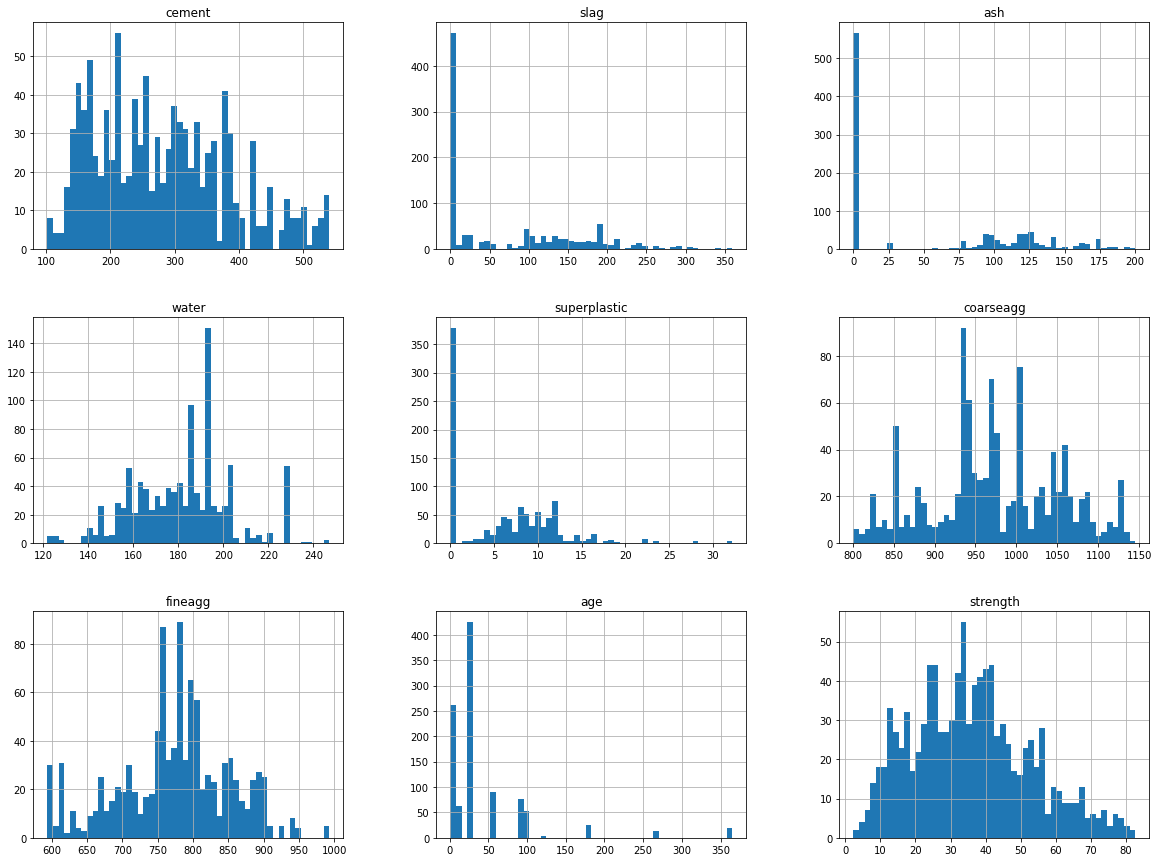

In [8]:
concrete.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
concrete['age'].value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='strength'>

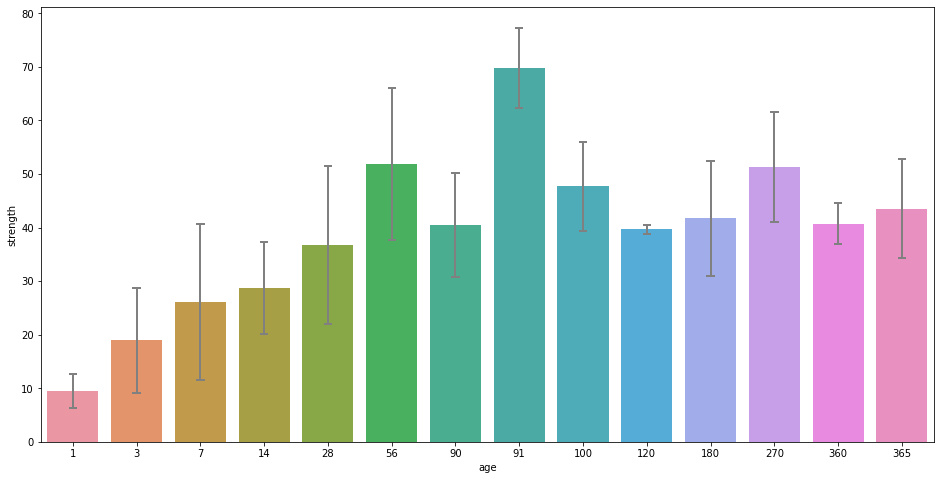

In [10]:
plt.figure(figsize=(16,8))
sns.barplot(x='age', y='strength', data=concrete, capsize=0.1,errcolor='gray', errwidth=2, ci='sd')

<AxesSubplot:xlabel='age', ylabel='strength'>

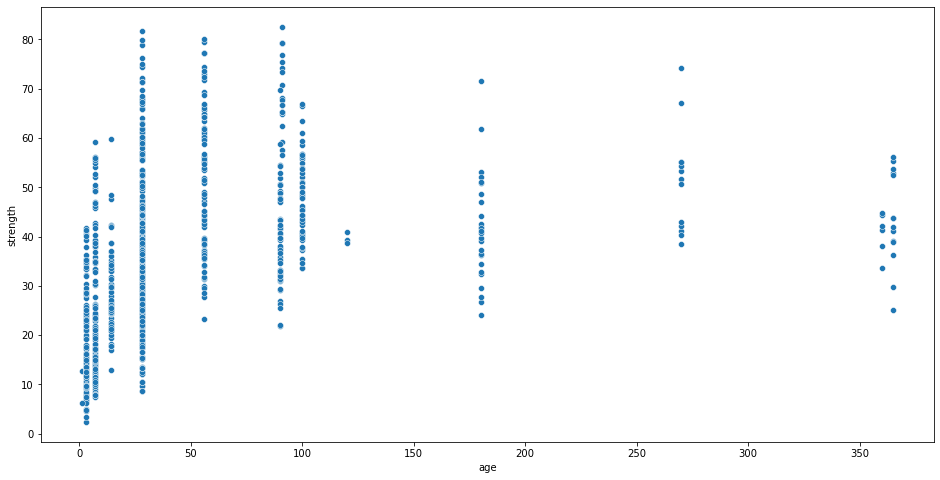

In [11]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='age', y='strength', data=concrete)

<AxesSubplot:>

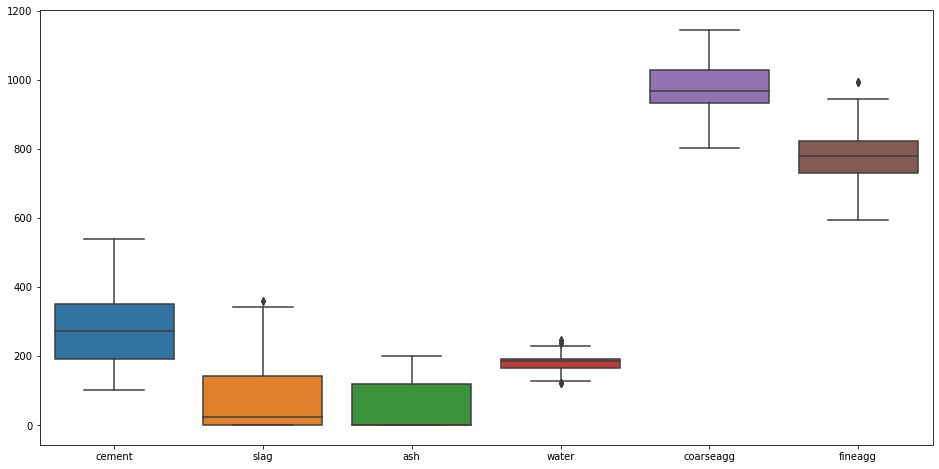

In [12]:
plt.figure(figsize=(16,8))
sns.boxplot(data= concrete[['cement', 'slag', 'ash', 'water', 'coarseagg', 'fineagg']])

In [13]:
concrete = concrete.copy()

In [14]:
concrete['CEM III'] = concrete['cement'] + concrete['slag']
concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,CEM III
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,353.3
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,211.1
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,250.0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,380.0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,338.2
...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,135.0
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30,531.3
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,392.4
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06,380.0


In [15]:
# Equivalent w/z
concrete['(w/z)eq'] = concrete['water'] / ( concrete['CEM III'] + 0.4 * concrete['ash'] )
concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,CEM III,(w/z)eq
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,353.3,0.575998
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,211.1,0.606932
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,250.0,0.650062
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,380.0,0.600000
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,338.2,0.571555
...,...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,135.0,0.893744
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30,531.3,0.266893
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,392.4,0.419117
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06,380.0,0.600000


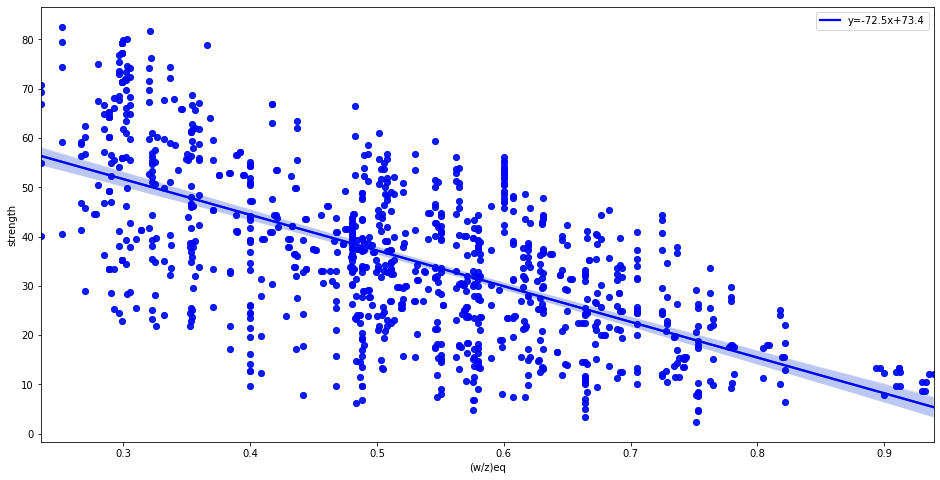

In [16]:
from scipy import stats

plt.figure(figsize=(16,8))
sns.regplot(x='(w/z)eq', y='strength', data=concrete)

slope, intercept, r_value, p_value, std_err = stats.linregress(concrete['(w/z)eq'],concrete['strength'])


ax = sns.regplot(x='(w/z)eq', y='strength', data=concrete, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

<ipython-input-17-c8bfa1afd80d>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(concrete.corr(), dtype=np.bool))


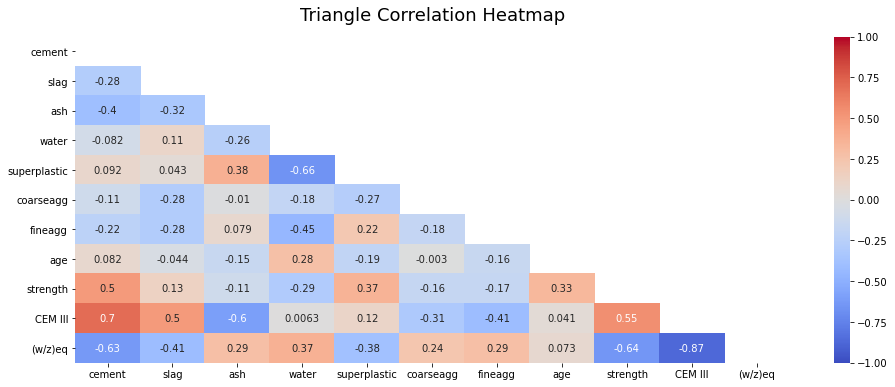

In [17]:
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(concrete.corr(), dtype=np.bool))
heatmap = sns.heatmap(concrete.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

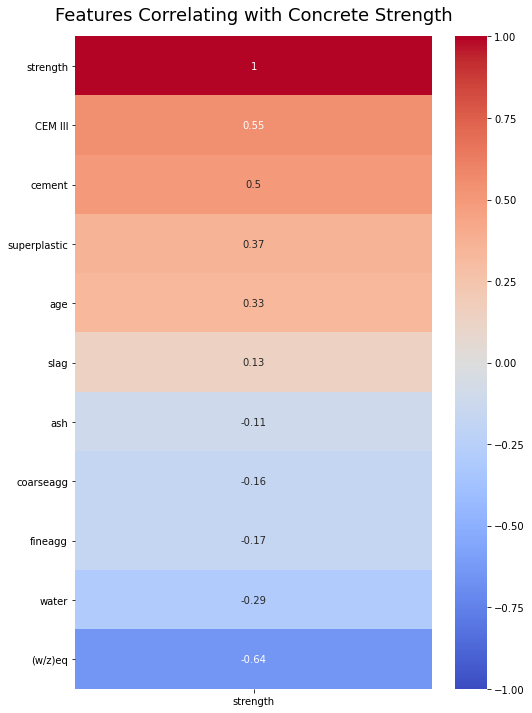

In [18]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(concrete.corr()[['strength']].sort_values(by='strength', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlating with Concrete Strength', fontdict={'fontsize':18}, pad=16);

Stratify Data (train data should have similar feature distribution than original data)

In [19]:
# for the model training, the same age distribution should be applied than in the original model
concrete["age_cat"] = pd.cut(concrete["age"],
                               bins=[0., 7.0, 14.0, 28.0, 56.0, 91.0, 180, np.inf],
                               labels=[7, 14, 28, 56, 91, 180, 365])
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,CEM III,(w/z)eq,age_cat
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,353.3,0.575998,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,211.1,0.606932,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,250.0,0.650062,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,380.0,0.600000,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,338.2,0.571555,28


<AxesSubplot:>

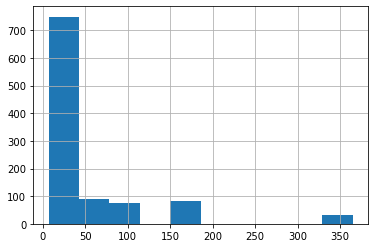

In [20]:
concrete['age_cat'].hist()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

In [22]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [23]:
for train_index, test_index in split.split(concrete, concrete["age_cat"]):
    strat_train_set = concrete.loc[train_index]
    strat_test_set = concrete.loc[test_index]

In [24]:
strat_train_set["age_cat"].value_counts() / len(strat_train_set)

28     0.412621
7      0.253641
56     0.088592
180    0.078883
91     0.074029
14     0.060680
365    0.031553
Name: age_cat, dtype: float64

In [25]:
concrete['age_cat'].value_counts()/len(concrete['age'])

28     0.412621
7      0.254369
56     0.088350
180    0.078641
91     0.073786
14     0.060194
365    0.032039
Name: age_cat, dtype: float64

Train, Test, Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_set, test_set = train_test_split(concrete, test_size=0.2, random_state=42)

In [28]:
len(train_set)

824

In [29]:
len(test_set)

206

In [30]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,CEM III,(w/z)eq,age_cat
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,353.3,0.575998,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,211.1,0.606932,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,250.0,0.650062,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,380.0,0.600000,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,338.2,0.571555,28


In [31]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("age_cat", axis=1, inplace=True)

In [32]:
concrete = strat_train_set.copy()

Seperate attributes from labels

In [33]:
concrete = strat_train_set.drop("strength", axis=1)
concrete_labels = strat_train_set["strength"].copy()

In [34]:
concrete_labels.head()

568    13.12
566    26.14
462    39.23
732    79.99
436    53.39
Name: strength, dtype: float64

In [35]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 568 to 317
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        824 non-null    float64
 1   slag          824 non-null    float64
 2   ash           824 non-null    float64
 3   water         824 non-null    float64
 4   superplastic  824 non-null    float64
 5   coarseagg     824 non-null    float64
 6   fineagg       824 non-null    float64
 7   age           824 non-null    int64  
 8   CEM III       824 non-null    float64
 9   (w/z)eq       824 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 70.8 KB


Imputing missing values --> not necessary in this case

One-Hot-Encoding of categorical values --> no categorical values in dataset

In [36]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,CEM III,(w/z)eq
568,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,3,251.4,0.631026
566,144.0,136.0,106.0,178.0,7.0,941.0,774.0,28,280.0,0.552109
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,210.1,0.441913
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,540.0,0.300000
436,446.0,24.0,79.0,162.0,10.3,967.0,712.0,28,470.0,0.322967


Adding and combine cutomized attributes to model by fitting and transforming those attributes with customized CombineAttributeAdder Class

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

In [38]:
concrete.values[0]

array([2.5140000e+02, 0.0000000e+00, 1.1830000e+02, 1.8850000e+02,
       6.4000000e+00, 1.0284000e+03, 7.5770000e+02, 3.0000000e+00,
       2.5140000e+02, 6.3102571e-01])

In [39]:
# consider superplasticizer amount in (w/z)eq as another attribute
#ash_ix, water_ix, superplastic_ix, CEMIII_ix = 2, 3, 4, 8 #num are col position in concrete df 
col_names = "ash", "water", "superplastic", "CEM III"
ash_ix, water_ix, superplastic_ix, CEMIII_ix = [concrete.columns.get_loc(c) for c in col_names]


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_factor=True): # no *args or **kargs
        self.add_factor = add_factor
        
    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X, y=None):
        wz_eq = ( X[:, water_ix] + X[:, superplastic_ix] ) / ( X[:, CEMIII_ix] + 0.4 * X[:, ash_ix])
        
        if self.add_factor is True:
            return np.c_[X, wz_eq * self.add_factor]
        else:
            return np.c_[X, wz_eq]
        
attr_adder = CombinedAttributesAdder(add_factor=False)
concrete_extra_attribs = attr_adder.transform(concrete.values)
concrete_extra_attribs[0]

array([2.51400000e+02, 0.00000000e+00, 1.18300000e+02, 1.88500000e+02,
       6.40000000e+00, 1.02840000e+03, 7.57700000e+02, 3.00000000e+00,
       2.51400000e+02, 6.31025710e-01, 6.52450455e-01])

Create pipeline for numerical and/or categorical values (e.g. in this case no impute, just add attributes and scale data (either min/max scaler or standard dev scaler to lower outlier impact)

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [41]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler())])

In [42]:
concrete_tr = num_pipeline.fit_transform(concrete)
concrete_tr[0]

array([-0.25984465, -0.87431626,  1.02572617,  0.30277946,  0.04057278,
        0.70501606, -0.1894303 , -0.67609511, -0.90734446,  0.75498946,
        0.78583096])

In [43]:
#this step is not necessary, however this pipeline comes in handy if you
#have to deal with numerical and categorical values
num_attribs = list(concrete)
#cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs)
    ])
concrete_prepared = full_pipeline.fit_transform(concrete)
concrete_prepared[0]

array([-0.25984465, -0.87431626,  1.02572617,  0.30277946,  0.04057278,
        0.70501606, -0.1894303 , -0.67609511, -0.90734446,  0.75498946,
        0.78583096])

**ML-models**

Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(concrete_prepared, concrete_labels)

LinearRegression()

In [46]:
some_data = concrete.iloc[:5]
some_data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,CEM III,(w/z)eq
568,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,3,251.4,0.631026
566,144.0,136.0,106.0,178.0,7.0,941.0,774.0,28,280.0,0.552109
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,210.1,0.441913
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,540.0,0.300000
436,446.0,24.0,79.0,162.0,10.3,967.0,712.0,28,470.0,0.322967


In [47]:
some_labels = concrete_labels.iloc[:5]
some_labels

568    13.12
566    26.14
462    39.23
732    79.99
436    53.39
Name: strength, dtype: float64

In [48]:
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared

array([[-0.25984465, -0.87431626,  1.02572617,  0.30277946,  0.04057278,
         0.70501606, -0.1894303 , -0.67609511, -0.90734446,  0.75498946,
         0.78583096],
       [-1.29637007,  0.69453355,  0.83212063, -0.18932105,  0.14076851,
        -0.41700455,  0.01349653, -0.27927594, -0.65470656,  0.21589734,
         0.24854857],
       [-1.06474428, -0.38866496,  1.74190926, -2.82323045, -0.07632223,
         1.09400032,  0.08943847,  0.86356327, -1.27216772, -0.53687287,
        -0.51148541],
       [ 2.52545553, -0.87431626, -0.83634987, -0.9391885 , -0.61069944,
         0.85393413, -1.20655433, -0.27927594,  1.64200164, -1.50630299,
        -1.59087141],
       [ 1.6182545 , -0.59746041,  0.40713286, -0.9391885 ,  0.69184501,
        -0.08322268, -0.75837238, -0.27927594,  1.02365712, -1.34941491,
        -1.32525995]])

In [49]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [25.37903914 29.08755016 46.5095306  51.12630572 52.68734411]


In [50]:
print("Labels:", list(some_labels))

Labels: [13.12, 26.14, 39.23, 79.99, 53.39]


Sqr root error of predicted values

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
concrete_predictions = lin_reg.predict(concrete_prepared)
lin_mse = mean_squared_error(concrete_labels, concrete_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

10.314981667692688

Decision Tree Regression Model

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(concrete_prepared, concrete_labels)

DecisionTreeRegressor()

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
scores = cross_val_score(tree_reg, concrete_prepared, concrete_labels, 
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [57]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [7.57712458 6.98045993 6.24791616 4.5336106  7.08785166 6.2143688
 6.01565757 5.18466301 5.97132375 6.72232266]
Mean: 6.253529870451176
Standard deviation: 0.8622399376044707


Ensemble Random Forest Regression Model

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
forest_reg = RandomForestRegressor()
forest_reg.fit(concrete_prepared, concrete_labels)

RandomForestRegressor()

In [60]:
concrete_predi = forest_reg.predict(concrete_prepared)
forest_mse = mean_squared_error(concrete_labels, concrete_predi)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.090325832387408

In [61]:
forest_scores = cross_val_score(forest_reg, concrete_prepared, concrete_labels, 
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [62]:
display_scores(forest_rmse_scores)

Scores: [6.20241721 5.68583025 4.90306293 4.13392297 5.18753943 5.22942261
 4.6389418  3.65374073 5.65186428 5.00491905]
Mean: 5.029166125905948
Standard deviation: 0.7157292709767809


SVM

In [63]:
from sklearn.svm import SVR

In [64]:
sv_reg = SVR(kernel = 'rbf')
sv_reg.fit(concrete_prepared, concrete_labels)

SVR()

In [65]:
concrete_predi = sv_reg.predict(concrete_prepared)
sv_mse = mean_squared_error(concrete_labels, concrete_predi)
sv_rmse = np.sqrt(sv_mse)
sv_rmse

9.544428652366054

In [66]:
sv_scores = cross_val_score(sv_reg, concrete_prepared, concrete_labels, 
                         scoring="neg_mean_squared_error", cv=10)
sv_rmse_scores = np.sqrt(-sv_scores)

In [67]:
display_scores(sv_rmse_scores)

Scores: [10.18193966 10.55105891  9.87227385  9.76795261  9.24903934  9.97144546
 10.49293351  9.96622584 10.30945255 10.26549787]
Mean: 10.06278195837328
Standard deviation: 0.3664210144543127


In [68]:
sv_reg1 = SVR(kernel = 'linear')
sv_reg1.fit(concrete_prepared, concrete_labels)

SVR(kernel='linear')

In [69]:
concrete_predi = sv_reg1.predict(concrete_prepared)
sv_mse1 = mean_squared_error(concrete_labels, concrete_predi)
sv_rmse1 = np.sqrt(sv_mse1)
sv_rmse1

10.565117373714948

In [70]:
sv_scores1 = cross_val_score(sv_reg1, concrete_prepared, concrete_labels, 
                         scoring="neg_mean_squared_error", cv=10)
sv_rmse_scores1 = np.sqrt(-sv_scores1)

In [71]:
display_scores(sv_rmse_scores1)

Scores: [11.31506107 10.74562441  9.54230053 10.44888725 13.05442156 11.6990056
 10.5434773  10.63086754  9.81614702 10.80062472]
Mean: 10.859641699294873
Standard deviation: 0.9429085748686192


Use Grid Search to find best hyperparameter for model fine tuning

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(concrete_prepared, concrete_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [74]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [75]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [76]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

8.263098569031879 {'max_features': 2, 'n_estimators': 3}
6.088872880310446 {'max_features': 2, 'n_estimators': 10}
5.873827886120814 {'max_features': 2, 'n_estimators': 30}
6.136912266326876 {'max_features': 4, 'n_estimators': 3}
5.551485240637625 {'max_features': 4, 'n_estimators': 10}
5.237557480765028 {'max_features': 4, 'n_estimators': 30}
6.191863709170743 {'max_features': 6, 'n_estimators': 3}
5.427917199404707 {'max_features': 6, 'n_estimators': 10}
5.18624588294738 {'max_features': 6, 'n_estimators': 30}
5.990550085611874 {'max_features': 8, 'n_estimators': 3}
5.490170886152113 {'max_features': 8, 'n_estimators': 10}
5.288363965946051 {'max_features': 8, 'n_estimators': 30}
6.576300373043253 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
5.799346135280753 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
6.349084550537659 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
5.374552702662379 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [77]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007200,4.000902e-04,0.001,1.168008e-07,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-69.242534,-57.558110,...,-68.278798,6.200867,18,-17.321367,-15.804034,-20.934225,-14.343228,-15.147392,-16.710049,2.327315
1,0.020001,9.536743e-08,0.002,9.536743e-08,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-44.202906,-30.216603,...,-37.074373,5.224256,13,-6.495524,-7.329586,-7.930454,-8.407614,-8.619239,-7.756483,0.770823
2,0.062004,5.585880e-03,0.004,9.536743e-08,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-41.033969,-33.310209,...,-34.501854,3.739645,10,-4.792119,-6.742277,-6.035895,-6.085547,-6.585748,-6.048317,0.685564
3,0.007800,4.000187e-04,0.001,1.168008e-07,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-43.662087,-28.927502,...,-37.661692,8.672946,14,-10.073576,-10.503776,-8.026530,-10.382753,-13.058832,-10.409094,1.601247
4,0.024001,8.945756e-04,0.002,1.168008e-07,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-42.284532,-24.451071,...,-30.818988,6.388233,8,-4.643076,-6.580488,-6.260340,-6.539411,-6.607817,-6.126226,0.751895


In [78]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.03352575, 0.01679955, 0.0078227 , 0.0214048 , 0.0183565 ,
       0.01249229, 0.01540645, 0.37577595, 0.03891682, 0.31790879,
       0.14159041])

In [79]:
extra_attribs = ["(w/z)eq with PCE"]
#cat_encoder = full_pipeline.named_transformers_["num"]
#cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.37577595284837234, 'age'),
 (0.31790878523755706, '(w/z)eq'),
 (0.14159040926621186, '(w/z)eq with PCE'),
 (0.03891681596631737, 'CEM III'),
 (0.03352574992117706, 'cement'),
 (0.02140479963067171, 'water'),
 (0.018356496666954, 'superplastic'),
 (0.016799547593771176, 'slag'),
 (0.015406450114636679, 'fineagg'),
 (0.012492288782647376, 'coarseagg'),
 (0.007822703971683366, 'ash')]

Run Randomized Search to find best hyperparameter for model fine tuning

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [81]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(concrete_prepared, concrete_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000C6C0CA0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000BA0D940>},
                   random_state=42, scoring='neg_mean_squared_error')

In [82]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [83]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5.141094595380975 {'max_features': 7, 'n_estimators': 180}
5.218552127884204 {'max_features': 5, 'n_estimators': 15}
5.231280490643911 {'max_features': 3, 'n_estimators': 72}
5.192165315957373 {'max_features': 5, 'n_estimators': 21}
5.158785508767554 {'max_features': 7, 'n_estimators': 122}
5.211228545395396 {'max_features': 3, 'n_estimators': 75}
5.240061654177894 {'max_features': 3, 'n_estimators': 88}
5.144858656624691 {'max_features': 5, 'n_estimators': 100}
5.225180928599851 {'max_features': 3, 'n_estimators': 150}
6.437040163064209 {'max_features': 5, 'n_estimators': 2}


In [84]:
feature_importances1 = rnd_search.best_estimator_.feature_importances_
feature_importances1

array([0.03321227, 0.01781104, 0.00645712, 0.02171853, 0.01894036,
       0.01340614, 0.01665117, 0.36764126, 0.03942768, 0.30832937,
       0.15640505])

In [85]:
extra_attribs = ["(w/z)eq with PCE"]
#cat_encoder = full_pipeline.named_transformers_["num"]
#cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs
sorted(zip(feature_importances1, attributes), reverse=True)

[(0.36764126190851804, 'age'),
 (0.3083293709660524, '(w/z)eq'),
 (0.15640504672062078, '(w/z)eq with PCE'),
 (0.03942768473352841, 'CEM III'),
 (0.033212272031964044, 'cement'),
 (0.021718525646314414, 'water'),
 (0.01894036044796242, 'superplastic'),
 (0.017811040933529337, 'slag'),
 (0.01665117288015912, 'fineagg'),
 (0.013406143568942019, 'coarseagg'),
 (0.0064571201624091116, 'ash')]

Finally: Test model on test set with grid search best hyperparameter estimator

In [86]:
strat_test_set.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,CEM III,(w/z)eq
775,275.0,0.0,0.0,183.0,0.0,1088.0,808.0,28,24.50,275.0,0.665455
778,314.0,0.0,113.0,170.0,10.0,925.0,783.0,28,38.46,314.0,0.473274
592,238.1,0.0,0.0,185.7,0.0,1118.8,789.3,7,10.34,238.1,0.779924
247,213.7,0.0,174.7,154.8,10.2,1053.5,776.4,28,40.15,213.7,0.545878
513,164.0,0.0,200.0,181.0,13.0,849.0,846.0,28,15.09,164.0,0.741803


In [87]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("strength", axis=1)
y_test = strat_test_set["strength"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [88]:
final_rmse

5.202046492616689

In [89]:
from scipy import stats

In [90]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([4.31279021, 5.96006846])

Fine-tuning and other Regressions

KNN Regression

In [91]:
from sklearn.neighbors import KNeighborsRegressor

In [92]:
knn_reg = KNeighborsRegressor(n_neighbors = 5)
knn_reg.fit(concrete_prepared, concrete_labels)

KNeighborsRegressor()

In [93]:
concrete_pred = knn_reg.predict(concrete_prepared)
knn_mse = mean_squared_error(concrete_labels, concrete_pred)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

7.281511014239108

In [94]:
knn_scores = cross_val_score(knn_reg, concrete_prepared, concrete_labels, 
                         scoring="neg_mean_squared_error", cv=10)
knn_rmse_scores = np.sqrt(-knn_scores)

In [95]:
display_scores(knn_rmse_scores)

Scores: [ 8.91369331  8.74797502  9.1396905   9.15288504  9.12103852  9.34901352
 10.61417523  8.49692863  9.22408939  9.40105334]
Mean: 9.216054247749554
Standard deviation: 0.5341555382420201


In [96]:
def plot_complexity_curve(k_list, knn_model, x_train, x_test, y_train, y_test):
    
    train_scores = []
    test_scores = []
    
    # For each k
    for k in k_list:
        # Initialize, fit, predict
        knn = knn_model(k)
        
        knn.fit(x_train, y_train)
        
        train_scores.append(knn.score(x_train, y_train))
        test_scores.append(knn.score(x_test, y_test))

    # Plot
    fig, ax = plt.subplots(figsize=(10,6))
    
    ax.plot(k_list, train_scores, label='Training Accuracy', color='red')
    ax.plot(k_list, test_scores, label='Testing Accuracy', color='black')
    
    ax.set(title='k-NN with Different Values for $k$',
           xlabel='Number of Neighbors',
           ylabel='Accuracy')
    
    ax.legend()

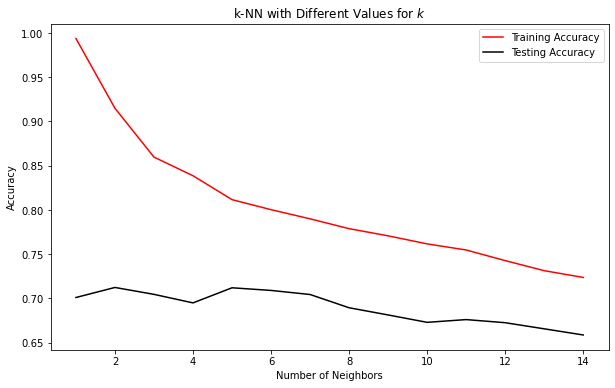

In [97]:
neighbors = np.arange(1, 15)

plot_complexity_curve(neighbors, KNeighborsRegressor, 
                    concrete_prepared, X_test_prepared, concrete_labels, y_test)

k = 4 and 5 give the best score!

**Fine-tune the model**

Remove non-important attributes from model

In [101]:
#remove (w/z)eq with PCE', ash, coarse aggregate and slag from feature matrix

class AttributesRemover(BaseEstimator, TransformerMixin):
    def __init__(self, columns): # no *args or **kargs
        self.columns = columns
        
    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X, y=None):
        return X.drop(self.columns, axis=1) 

In [102]:
num_pipeline1 = Pipeline([
    ('attribs_remover', AttributesRemover(['ash', 'slag', 'coarseagg']))])

In [103]:
concrete_new = num_pipeline1.fit_transform(concrete)
concrete_new.head()

,cement,water,superplastic,fineagg,age,CEM III,(w/z)eq
568,251.4,188.5,6.4,757.7,3,251.4,0.631026
566,144.0,178.0,7.0,774.0,28,280.0,0.552109
462,168.0,121.8,5.7,780.1,100,210.1,0.441913
732,540.0,162.0,2.5,676.0,28,540.0,0.300000
436,446.0,162.0,10.3,712.0,28,470.0,0.322967


Outlier Removal

In [104]:
class OutlierRemover(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor
        
    def outlier_detector(self,X,y=None):
        X = pd.Series(X).copy()
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        self.lower_bound.append(q1 - (self.factor * iqr))
        self.upper_bound.append(q3 + (self.factor * iqr))

    def fit(self,X,y=None):
        self.lower_bound = []
        self.upper_bound = []
        X.apply(self.outlier_detector)
        return self
    
    def transform(self,X,y=None):
        X = pd.DataFrame(X).copy()
        for i in range(X.shape[1]):
            x = X.iloc[:, i].copy()
            x[(x < self.lower_bound[i]) | (x > self.upper_bound[i])] = np.nan
            X.iloc[:, i] = x
        return X
    
outlier_remover = OutlierRemover(factor=1.5)

In [105]:
num_pipeline2 = Pipeline([
    ('outlier', OutlierRemover()),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

In [106]:
concrete_tr1 = num_pipeline2.fit_transform(concrete_new)

In [107]:
np.isnan(concrete_tr1).any()

False

In [108]:
num_attribs1 = list(concrete_new)
#cat_attribs = ["ocean_proximity"]
full_pipeline1 = ColumnTransformer([
    ("num", num_pipeline2, num_attribs1)
])
concrete_prepared_new = full_pipeline1.fit_transform(concrete_new)
concrete_prepared_new[0]

array([-0.25984465,  0.31109858,  0.08116533, -0.17985952, -1.05326765,
       -0.90734446,  0.75498946])

In [109]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline1),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(concrete_new, concrete_labels)
concrete_pre = full_pipeline_with_predictor.predict(concrete_new)

In [110]:
linreg_mse = mean_squared_error(concrete_labels, concrete_pre)
linreg_rmse = np.sqrt(linreg_mse)
linreg_rmse

8.944345282913426

Random Search with Forest Regressor on new tuned dataset (transformer)

In [111]:
forest_reg1 = RandomForestRegressor()
forest_reg1.fit(concrete_prepared_new, concrete_labels)

RandomForestRegressor()

In [112]:
concrete_pred1 = forest_reg1.predict(concrete_prepared_new)
forest_mse = mean_squared_error(concrete_labels, concrete_pred1)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.29418092145056

In [113]:
forest_scores1 = cross_val_score(forest_reg1, concrete_prepared_new, concrete_labels, 
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores1 = np.sqrt(-forest_scores1)

In [114]:
display_scores(forest_rmse_scores1)

Scores: [6.05552734 5.45918164 5.35139055 4.82793984 5.23750699 5.63916311
 4.23898095 4.17025247 5.952227   5.20378232]
Mean: 5.213595219829147
Standard deviation: 0.6084956939224692


In [115]:
param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg1 = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg1, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(concrete_prepared_new, concrete_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000BB398B0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000000BA930A0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [116]:
cvres3 = rnd_search.cv_results_
for mean_score, params in zip(cvres3["mean_test_score"], cvres3["params"]):
    print(np.sqrt(-mean_score), params)

5.403911379204911 {'max_features': 7, 'n_estimators': 180}
5.49321379837044 {'max_features': 5, 'n_estimators': 15}
5.267016814911384 {'max_features': 3, 'n_estimators': 72}
5.46358521907218 {'max_features': 5, 'n_estimators': 21}
5.412709271933811 {'max_features': 7, 'n_estimators': 122}
5.253408258171142 {'max_features': 3, 'n_estimators': 75}
5.253089456666656 {'max_features': 3, 'n_estimators': 88}
5.332906905946926 {'max_features': 5, 'n_estimators': 100}
5.226590801247389 {'max_features': 3, 'n_estimators': 150}
6.962087039515828 {'max_features': 5, 'n_estimators': 2}


In [117]:
feature_importances2 = rnd_search.best_estimator_.feature_importances_
feature_importances2

array([0.08075157, 0.06727789, 0.03423771, 0.02921176, 0.33234843,
       0.14107576, 0.31509688])

In [118]:
attributes = num_attribs1
sorted(zip(feature_importances2, attributes), reverse=True)

[(0.3323484329688138, 'age'),
 (0.31509687811923026, '(w/z)eq'),
 (0.14107576021834534, 'CEM III'),
 (0.08075156513495575, 'cement'),
 (0.06727788704261903, 'water'),
 (0.034237711907734655, 'superplastic'),
 (0.029211764608301126, 'fineagg')]

Final testing of tuned model

In [119]:
strat_test_set_new = strat_test_set.copy()
strat_test_set_new

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,CEM III,(w/z)eq
775,275.0,0.0,0.0,183.0,0.0,1088.0,808.0,28,24.50,275.0,0.665455
778,314.0,0.0,113.0,170.0,10.0,925.0,783.0,28,38.46,314.0,0.473274
592,238.1,0.0,0.0,185.7,0.0,1118.8,789.3,7,10.34,238.1,0.779924
247,213.7,0.0,174.7,154.8,10.2,1053.5,776.4,28,40.15,213.7,0.545878
513,164.0,0.0,200.0,181.0,13.0,849.0,846.0,28,15.09,164.0,0.741803
...,...,...,...,...,...,...,...,...,...,...,...
946,142.0,167.0,130.0,174.0,11.0,883.0,785.0,28,44.61,309.0,0.481994
119,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,14,33.36,251.8,0.500754
373,388.6,97.1,0.0,157.9,12.1,852.1,925.7,28,50.70,485.7,0.325098
638,186.2,124.1,0.0,185.7,0.0,1083.4,764.3,7,8.00,310.3,0.598453


In [120]:
final_model2 = rnd_search.best_estimator_
X_test = strat_test_set_new.drop(["strength", 'slag', 'ash', 'coarseagg'], axis=1)
y_test = strat_test_set_new["strength"].copy()
X_test_prepared = full_pipeline1.transform(X_test)
final_predictions1 = final_model2.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions1)
final_rmse = np.sqrt(final_mse)

In [121]:
final_rmse

4.84747037470688

Fine-tuning resulted in marginal improvement of model. Prediction accuracy is about 5 Mpa

**Last fine-tune of model with top feature selector**

In [123]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [124]:
k = 5

In [125]:
top_k_feature_indices = indices_of_top_k(feature_importances2, k)
top_k_feature_indices

array([0, 1, 4, 5, 6], dtype=int64)

In [126]:
np.array(attributes)[top_k_feature_indices]

array(['cement', 'water', 'age', 'CEM III', '(w/z)eq'], dtype='<U12')

In [132]:
sorted(zip(feature_importances2, attributes), reverse=True)[:k]

[(0.3323484329688138, 'age'),
 (0.31509687811923026, '(w/z)eq'),
 (0.14107576021834534, 'CEM III'),
 (0.08075156513495575, 'cement'),
 (0.06727788704261903, 'water')]

In [135]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline1),
    ('feature_selection', TopFeatureSelector(feature_importances2, k))
])

In [136]:
concrete_prepared_new_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(concrete_new)

In [138]:
concrete_prepared_new_top_k_features[:3]

array([[-0.25984465,  0.31109858, -1.05326765, -0.90734446,  0.75498946],
       [-1.29637007, -0.1962574 , -0.15348688, -0.65470656,  0.21589734],
       [-1.06474428,  0.17580366,  2.43788175, -1.27216772, -0.53687287]])

In [139]:
concrete_prepared_new[0:3, top_k_feature_indices]

array([[-0.25984465,  0.31109858, -1.05326765, -0.90734446,  0.75498946],
       [-1.29637007, -0.1962574 , -0.15348688, -0.65470656,  0.21589734],
       [-1.06474428,  0.17580366,  2.43788175, -1.27216772, -0.53687287]])

In [140]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline1),
    ('feature_selection', TopFeatureSelector(feature_importances2, k)),
    ('forest_reg', RandomForestRegressor(**rnd_search.best_params_))
])

In [141]:
prepare_select_and_predict_pipeline.fit(concrete_new, concrete_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   OutlierRemover()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['cement', 'water',
                                                   'superplastic', 'fineagg',
                                                   'age', 'CEM III',
                                                   '(w/z)eq'])])),
                ('feature_selection',
                 TopFeatureSelector(feature_importances=array([0.08075157, 0

In [148]:
some_data = concrete_new.iloc[:4]
some_labels = concrete_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [14.71231111 28.0051627  42.94171667 75.64084111]
Labels:		 [13.12, 26.14, 39.23, 79.99]
